In [8]:
import numpy as np
import json
import sys
import os

sys.path.append(os.path.dirname(os.getcwd()))
from utils import get_file_results
from itertools import product
from os.path import join
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [36]:
DATASETS = [
    'AIDS', 'BZR', 'BZR_MD', 'COX2', 'COX2_MD', 'DHFR', 'DHFR_MD', 'ER_MD', 'MUTAG',
    'Mutagenicity', 'NCI1', 'NCI109', 'PTC_FM', 'PTC_FR', 'PTC_MM', 'PTC_MR',
    'DD', 'ENZYMES', 'KKI', 'OHSU', 'Peking_1', 'PROTEINS_full', 'MSRC_9', 'MSRC_21',
    'COLLAB', 'IMDB-BINARY', 'IMDB-MULTI', 'REDDIT-BINARY', 'REDDIT-MULTI-5K', 'REDDIT-MULTI-12K',
    'FRANKENSTEIN', 'PROTEINS', 'COIL-DEL', 'COIL-RAG', 'Letter-high', 'Letter-low',
    'Letter-med',
]

LABELED = [
    'AIDS', 'BZR', 'BZR_MD', 'COX2', 'COX2_MD', 'DHFR', 'DHFR_MD', 'ER_MD', 'MUTAG',
    'Mutagenicity', 'NCI1', 'NCI109', 'PTC_FM', 'PTC_FR', 'PTC_MM', 'PTC_MR',
    'DD', 'ENZYMES', 'KKI', 'OHSU', 'Peking_1', 'PROTEINS_full', 'MSRC_9', 'MSRC_21',
]

UNLABELED = [dataset for dataset in DATASETS if dataset not in LABELED]

use_degrees = [False]

CLF_METHODS = ['KNN', 'GED', 'RBF', 'WL', 'NN', 'GNN']
CLF_METHODS = ['knn', 'rbf', 'WL', 'nn']

In [76]:
from collections import defaultdict
results_per_dataset = dict()
results_per_dataset_raw = dict()
for dataset in DATASETS:
    filename = join('./formated_results',
                    f'{dataset}.json')
    with open(filename, 'r') as f:
        data = json.load(f)
    
    # results_per_dataset[dataset] = {clf: mean_std['mean'] for clf, mean_std in data.items()}
    results_per_dataset[dataset] = np.array([mean_std['mean'] for clf, mean_std in data.items()])
    filename = join('./formated_results',
                    f'{dataset}_raw.json')
    with open(filename, 'r') as f:
        data = json.load(f)
    results_per_dataset_raw[dataset] = {clf: np.array(values) for clf, values in data.items()}
results_per_dataset_raw

{'AIDS': {'knn': array([0.9825, 0.9855, 0.981 , 0.9825, 0.9825, 0.9815, 0.981 , 0.9825,
         0.981 , 0.9835]),
  'rbf': array([0.9915, 0.992 , 0.9915, 0.99  , 0.991 , 0.9905, 0.991 , 0.9915,
         0.9915, 0.9915]),
  'WL': array([0.9815, 0.983 , 0.9805, 0.9815, 0.9795, 0.9835, 0.9825, 0.984 ,
         0.9815, 0.9825]),
  'nn': array([0.941 , 0.9355, 0.9435, 0.9345, 0.9315, 0.9415, 0.936 , 0.9505,
         0.945 , 0.939 ])},
 'BZR': {'knn': array([0.82713415, 0.82707317, 0.82219512, 0.82731707, 0.82219512,
         0.8297561 , 0.81987805, 0.84439024, 0.81993902, 0.82219512]),
  'rbf': array([0.8272561 , 0.83469512, 0.8372561 , 0.8322561 , 0.81469512,
         0.8495122 , 0.83713415, 0.83695122, 0.83207317, 0.85176829]),
  'WL': array([0.88878049, 0.89121951, 0.89140244, 0.88146341, 0.88621951,
         0.88182927, 0.88884146, 0.89621951, 0.86926829, 0.87908537]),
  'nn': array([0.81481707, 0.8002439 , 0.81268293, 0.78987805, 0.80256098,
         0.81243902, 0.8197561 , 0.8122561 

In [87]:
import pandas as pd
df = pd.DataFrame(results_per_dataset_raw['AIDS'])
df

,knn,rbf,WL,nn
0,0.9825,0.9915,0.9815,0.9410
1,0.9855,0.9920,0.9830,0.9355
2,0.9810,0.9915,0.9805,0.9435
3,0.9825,0.9900,0.9815,0.9345
4,0.9825,0.9910,0.9795,0.9315
5,0.9815,0.9905,0.9835,0.9415
6,0.9810,0.9910,0.9825,0.9360
7,0.9825,0.9915,0.9840,0.9505
8,0.9810,0.9915,0.9815,0.9450
9,0.9835,0.9915,0.9825,0.9390


In [84]:
df = pd.DataFrame.from_dict(results_per_dataset_raw)

<AxesSubplot: >

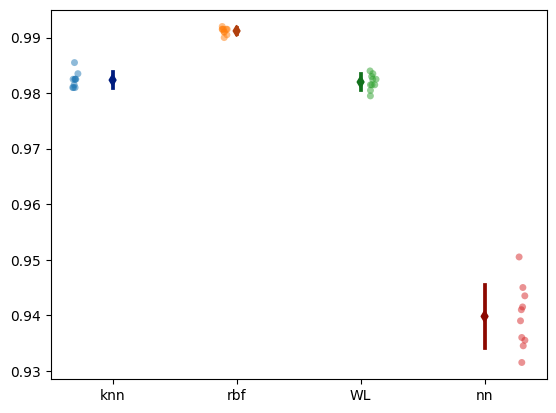

In [83]:
# sns.catplot(data=results_per_dataset['Mutagenicity'], errorbar='se')
sns.stripplot(
    data=df, #x="value", y="measurement", hue="species",
    dodge=True, #.5 - .8 / 3, 
    alpha=.5, zorder=1, legend=False
)

sns.pointplot(
    data=df, # x=['knn', 'rbf', 'WL', 'nn'],
    dodge=True, #.8 - .8 / 3,
    palette="dark",
    markers="d",
    scale=.75, errorbar='sd'
)


In [85]:
df = sns.load_dataset("anscombe")
df

,dataset,x,y
0,I,10.0,8.04
1,I,8.0,6.95
2,I,13.0,7.58
3,I,9.0,8.81
4,I,11.0,8.33
5,I,14.0,9.96
6,I,6.0,7.24
7,I,4.0,4.26
8,I,12.0,10.84
9,I,7.0,4.82


In [92]:
data = []
for dataset, res_per_clf in results_per_dataset_raw.items():
    for clf, results in res_per_clf.items():
        for value in results:
            data.append((dataset, clf, value))
        
df = pd.DataFrame(data, columns=['dataset', 'classifier', 'values'])
df

,dataset,classifier,values
0,AIDS,knn,0.982500
1,AIDS,knn,0.985500
2,AIDS,knn,0.981000
3,AIDS,knn,0.982500
4,AIDS,knn,0.982500
...,...,...,...
1465,Letter-med,nn,0.249333
1466,Letter-med,nn,0.254222
1467,Letter-med,nn,0.253778
1468,Letter-med,nn,0.255556


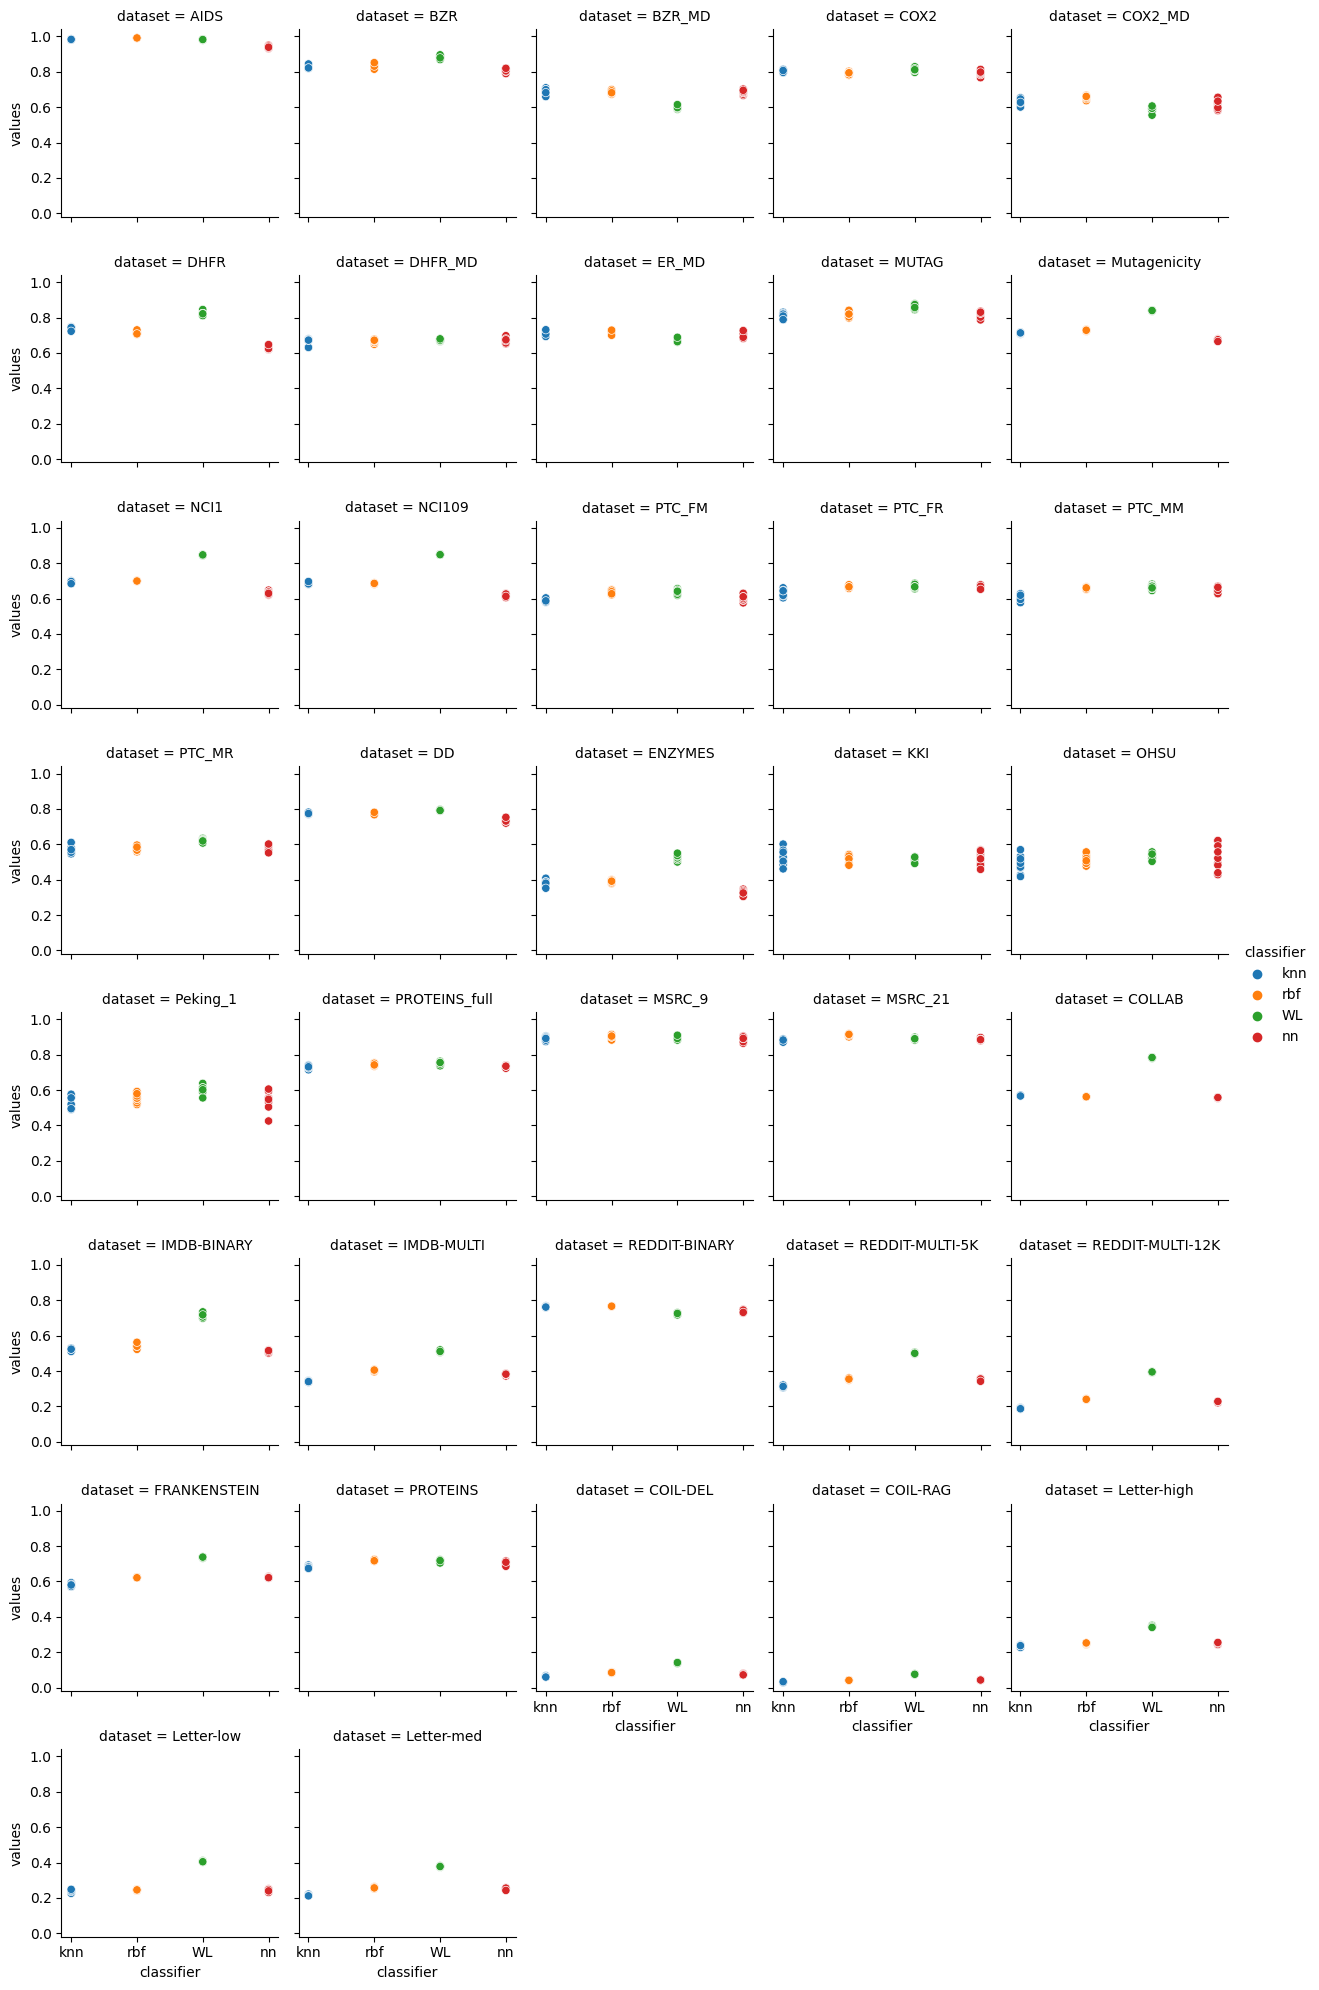

In [107]:
g = sns.relplot(
    data = df,
    x='classifier', y='values', col='dataset', hue='classifier',
    col_wrap=5, height=2.5,# legend=False,
)



# grid = sns.FacetGrid(df, col='dataset', hue='classifier',
#                      x_v
#                     col_wrap=4)
# 
# grid.map(sns.stripplot, x='classifier', y='values')
# sns.stripplot(
#     data=df, x="dataset", y='values', hue="classifier",#, col='dataset',
#     dodge=True, #.5 - .8 / 3, 
#     alpha=.5, zorder=1, legend=False
# )

# sns.pointplot(
#     data=df, # x=['knn', 'rbf', 'WL', 'nn'],
#     dodge=True, #.8 - .8 / 3,
#     palette="dark",
#     markers="d",
#     scale=.75, errorbar='sd'
# )
